In [1]:
from environment import Environment
from discreteAgent import Agent
from onlineTrainer_CCA_publish import OnlineTrainer as CCA_OnlineTrainer
from onlineTrainer_Qlearning import OnlineTrainer as QL_OnlineTrainer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [2]:
import json
from easydict import EasyDict
from datetime import date
import os
import torch

# Environment Params

In [3]:
args = EasyDict()
args.ENV_NAME = 'Bottleneck' 
args.continuous=False

In [4]:
env = Environment.bottleneck(initial_state_range=0)

In [5]:
env.N_obs

18

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


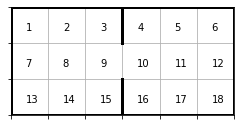

In [6]:
plt.figure(figsize = (4,2))
plt.xlim(0,6)
plt.ylim(0,3)

ax = plt.subplot(1,1,1)
for j in range(6):
    for i in range(3):
        ax.text(j+0.4,i+.65,str(1+6*i+j))
ax.plot((3,3),(2,3),'k',linewidth=3)
ax.plot((3,3),(0,1),'k',linewidth=3)
ax.plot((0,6),(0,0),'k',linewidth=3)
ax.plot((0,6),(3,3),'k',linewidth=3)
ax.plot((0,0),(0,3),'k',linewidth=3)
ax.plot((6,6),(0,3),'k',linewidth=3)

ax.grid()
ax.set_xticklabels(['','','','','',''])
ax.set_yticklabels(['','',''])
ax.invert_yaxis()


# Trainer Params

In [26]:
args.ALPHA = 0.03

args.OBS_LEAK = args.ALPHA * 1/env.N_obs

args.augmentation = True

In [27]:
args.ALPHA, args.OBS_LEAK

(0.03, 0.0016666666666666666)

# Agent Params

In [28]:
args.offPolicy = False

args.GAMMA = 1
args.HIST_HORIZON = 200 * int(1/args.OBS_LEAK)

args.KL_centering = True
args.rtg_centering = True

args.explo_drive = True

In [29]:
args.do_reward = True  
verbose = False
args.monte_carlo = True

In [30]:
mem_Q_var = {}
mem_Q_ref = {}
mem_Q_KL = {}
mem_obs_score = {}
mem_p_eff = {}
mem_KL = {}
mem_total_reward = {}
nb_visits_final = {}
mem_obs_final = {}
V = {}
cpt = {}

## TASK 1 : Uniform exploration

In [31]:
N = 2000

In [32]:
BETA_range = [1] 
args.PREC = 0

mem_obs_final_T1 = []


In [33]:
for turn, BETA in enumerate(BETA_range):
    print('**TURN**', turn)   
 
    agent = Agent(env,
                  ALPHA=args.ALPHA,
                  GAMMA=args.GAMMA, # Episodic agent!
                  BETA=BETA, 
                  PREC=args.PREC,
                  do_reward=args.do_reward) 
    trainer = CCA_OnlineTrainer( agent, 
                            augmentation=args.augmentation,
                            OBS_LEAK=args.OBS_LEAK,
                            ref_prob='unif',
                            KL_centering=args.KL_centering,
                            rtg_centering=args.rtg_centering,
                            monte_carlo=args.monte_carlo,
                            explo_drive=args.explo_drive) 
    
   
    mem_obs_final_T1.append(None)
    
    
    for trial in range(N):
        trainer.run_episode(verbose=verbose)
       
        if trial%1000 == 0:
            print(trial)
        
    mem_obs_final_T1[turn] = trainer.mem_obs_final
    

**TURN** 0
0
0.008310213508566614 0.006917937398241563
0.5041606785735545 0.46128960018875376
0.5830395603250862 0.5343230754263028
0.12815798251556235 0.044446908776398245
3.7140561976697617 3.5011536557071867
0.9818736748020842 0.7665394216676629
0.887286428706132 0.6109749787701697
0.5546268973479526 0.2236277576698984
1000
0.010484117090712813 -0.3338952662575716
2.8006369217006633 2.4400850379060652
4.383479100723414 4.024005199551239
1.8863567494334499 1.5127564871877053
0.029800774765879858 -0.34889457595976314
0.0018536161083984564 -0.37681180378158885
0.14529146000897505 -0.16232262898724262
1.413396905752427 1.1586428756328
0.1348015448434944 -0.09765390139182062
0.12181423222199024 -0.09004507159384505
0.015519667903527263 -0.19578740215800797


In [34]:
bloc_1 =  np.array(mem_obs_final_T1[0][:250])+1
bloc_2 =  np.array(mem_obs_final_T1[0][1000:2000])+1
nb_visits_1 = []
nb_visits_2 = []
for s in range(18):
    nb_visits_1.append(np.sum(bloc_1 == s+1))
    nb_visits_2.append(np.sum(bloc_2 == s+1))
    

Text(-2.5, 0.13, 'e')

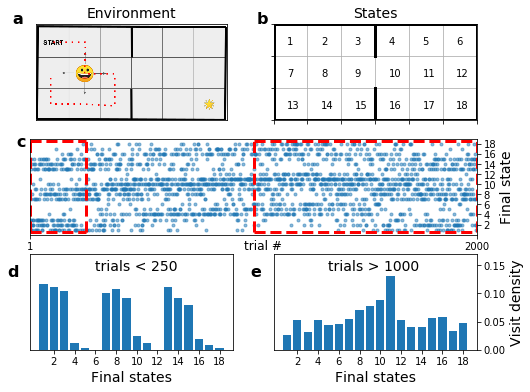

In [35]:
plt.figure(figsize = (8,6))

ax = plt.subplot(3,2,1)
img = mpimg.imread('env-1.png')
ax.imshow(img)
ax.set_title('Environment', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-50, 0, 'a', fontsize=16, fontweight ="bold")


ax = plt.subplot(3,2,2)

ax.set_xlim(0,6)
ax.set_ylim(0,3)
for j in range(6):
    for i in range(3):
        ax.text(j+0.4,i+.65,str(1+6*i+j))
ax.plot((3,3),(2,3),'k',linewidth=3)
ax.plot((3,3),(0,1),'k',linewidth=3)
ax.plot((0,6),(0,0),'k',linewidth=3)
ax.plot((0,6),(3,3),'k',linewidth=3)
ax.plot((0,0),(0,3),'k',linewidth=3)
ax.plot((6,6),(0,3),'k',linewidth=3)

ax.grid()
ax.set_xticklabels(['','','','','',''])
ax.set_yticklabels(['','',''])
ax.invert_yaxis()
ax.set_title('States', fontsize=14)
ax.text(-0.5, 0, 'b', fontsize=16, fontweight ="bold")



  
ax = plt.subplot(3,1,2)
ax.plot(np.array(mem_obs_final_T1[0])+1, '.', alpha=.5)
ax.set_xlim(0,1250)
ax.set_ylim(0,19)
ax.set_yticks([2,4,6,8,10,12,14,16,18])
ax.set_xticks([1, 2000])
ax.text(960, -3, 'trial #', fontsize=12)    
ax.set_ylabel('Final state', fontsize=14)
ax.plot([1,250],[0.5,0.5],'r--',linewidth=3)
ax.plot([1,250],[18.5,18.5],'r--',linewidth=3)
ax.plot([1,1],[0.5,18.5],'r--',linewidth=3)
ax.plot([250,250],[0.5,18.5],'r--',linewidth=3)
ax.plot([1001,2000],[0.5,0.5],'r--',linewidth=3)
ax.plot([1001,2000],[18.5,18.5],'r--',linewidth=3)
ax.plot([1001,1001],[0.5,18.5],'r--',linewidth=3)
ax.plot([2000,2000],[0.5,18.5],'r--',linewidth=3)
#ax.text(539, 19.5, 'CCA, $\lambda=0$', fontsize=14)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(-60, 17.5, 'c', fontsize=16, fontweight ="bold")



ax = plt.subplot(3,2,5)
ax.bar(range(1,19), np.array(nb_visits_1)/250)
ax.set_xticks(range(2,19,2))
ax.set_xlabel('Final states', fontsize=14)
ax.set_ylim([0,0.17]) #yscale('log') #
ax.text(6, 0.14, 'trials < 250', fontsize=14)
ax.set_yticks([])
ax.text(-2.5, 0.13, 'd', fontsize=16, fontweight ="bold")


ax = plt.subplot(3,2,6)
ax.bar(range(1,19), np.array(nb_visits_2)/1000)
ax.set_xticks(range(2,19,2))
ax.set_xlabel('Final states', fontsize=14)
ax.set_ylim([0,0.17]) #yscale('log') #
ax.text(5, 0.14,'trials > 1000', fontsize=14)
ax.set_ylabel('Visit density', fontsize=14)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.text(-2.5, 0.13, 'e', fontsize=16, fontweight ="bold")

#plt.savefig('220520_cca_T1.pdf', bbox_inches='tight')


## TASK 2 : Reward maximization

In [36]:
N = 5000

In [37]:
BETA_REF = 100
BETA_range = [BETA_REF] * 10
args.PREC = 10 / BETA_REF

mem_total_reward_T2 = []
mem_obs_final_T2 = []



In [38]:
args.ALPHA, args.PREC, args.OBS_LEAK

(0.03, 0.1, 0.0016666666666666666)

In [39]:
for turn, BETA in enumerate(BETA_range):
    print('**TURN**', turn)
     
    agent = Agent(env,
                  ALPHA=args.ALPHA,
                  GAMMA=args.GAMMA, # Episodic agent!
                  BETA=BETA, 
                  PREC=args.PREC,
                  do_reward=args.do_reward) 
    trainer = CCA_OnlineTrainer( agent, 
                            augmentation=args.augmentation,
                            OBS_LEAK=args.OBS_LEAK,
                            ref_prob='unif',
                            KL_centering=args.KL_centering,
                            rtg_centering=args.rtg_centering,
                            monte_carlo=args.monte_carlo,
                            explo_drive=args.explo_drive) 
    
    
    mem_total_reward_T2.append(np.zeros(N))
    
    mem_obs_final_T2.append(None)
        
    for trial in range(N):
        trainer.run_episode(verbose=verbose)

        if trial%1000 == 0:
            print(trial)
            
        mem_total_reward_T2[turn][trial] = trainer.total_reward
        
    mem_obs_final_T2[turn] = trainer.mem_obs_final
    

**TURN** 0
0
3.0373989616113274e-09 -5.377092479646712e-07
2.78504069673037e-07 -3.6360488558054514e-07
9.815553508213008e-06 7.79948789532527e-06
4.16480055798449e-06 1.1385330336596155e-06
1.1095144000504803e-06 -3.970171204787505e-06
6.167346377263956e-06 -1.6593869906137636e-06
1.9947411386946515e-07 -8.934998344239238e-06
3.6733595322386035e-05 2.7140800503565603e-05
6.66777281679033e-05 5.4528498437803825e-05
1.775607730098365e-05 9.443607447296491e-06
1000
3.761702918968364e-06 -1.960088319239267e-06
1.7968737224682213e-06 -3.31887089776928e-06
6.109887074138784e-07 -4.634745912781592e-06
2000
2.6497277832830726e-07 -5.567273389902854e-06
7.805412749307179e-05 7.171482750230955e-05
1.4571767165977012e-06 -4.262738067638128e-06
2.3824618299770203e-06 -3.1079038658787724e-06
2.580094886866941e-05 1.9697687157562173e-05
9.458427766454869e-06 4.981603672334103e-06
2.9997444001724453e-06 -1.265203497876727e-06
2.4474849455352836e-07 -3.909461028201651e-06
5.87015459765897e-09 -4.2566

1.2388577642664493e-05 -2.2909366686045352e-05
**TURN** 5
0
1.3545874064750906e-06 9.527439873835488e-07
6.383444005630508e-08 -4.566964920455222e-07
2.6841719795166697e-09 -5.219423577359847e-07
4.7066986066983147e-07 -1.1217831271043359e-07
5.098138541647119e-06 4.4498699167581835e-06
1.1039567896030972e-06 -6.668044514580683e-07
2.719088341201793e-07 -1.8156069902655198e-06
2.6926971209385652e-05 2.366808010495717e-05
6.063893523224013e-06 2.6629221724791745e-06
3.447737188250039e-05 2.2730317835057265e-05
3.21767893673619e-05 2.04135358538503e-05
6.457260031847431e-05 5.2454657418017787e-05
1.4879357717218984e-05 1.4845505141418763e-06
6.564926740532887e-05 5.412344858549618e-05
7.367003956483546e-06 -2.4102915192278145e-06
1000
4.308584420775361e-08 -9.299927916691969e-06
1.5199889619073795e-06 -4.500420233754335e-06
1.4723864838855878e-06 -4.518053498807763e-06
9.812645138653521e-08 -5.873539927899638e-06
1.1817623575143257e-08 -8.30339867565518e-06
2000
1.5521871744686832e-05 7.

#### Q-learning trainer (for comparison)

In [40]:
BETA_range = [1] * 10

mem_total_reward_T2_Q = []
mem_obs_final_T2_Q = []

In [41]:
for turn, BETA in enumerate(BETA_range):
    print('**TURN**', turn)
    
    agent_Q = Agent(env,
                    ALPHA=args.ALPHA,
                    GAMMA=args.GAMMA, # Episodic agent!
                    do_reward=args.do_reward,
                    offPolicy=True) 
    trainer_Q = QL_OnlineTrainer( agent_Q,
                            monte_carlo=args.monte_carlo,
                            rtg_centering=args.rtg_centering) 
    
    mem_total_reward_T2_Q.append(np.zeros(N))
    
    mem_obs_final_T2_Q.append(None)
        
    for trial in range(N):
        trainer_Q.run_episode(verbose=verbose)

        if trial%1000 == 0:
            print(trial)
            
        mem_total_reward_T2_Q[turn][trial] = trainer_Q.total_reward
        
    mem_obs_final_T2_Q[turn] = trainer_Q.mem_obs_final
    

**TURN** 0
0
1000
2000
3000
4000
**TURN** 1
0
1000
2000
3000
4000
**TURN** 2
0
1000
2000
3000
4000
**TURN** 3
0
1000
2000
3000
4000
**TURN** 4
0
1000
2000
3000
4000
**TURN** 5
0
1000
2000
3000
4000
**TURN** 6
0
1000
2000
3000
4000
**TURN** 7
0
1000
2000
3000
4000
**TURN** 8
0
1000
2000
3000
4000
**TURN** 9
0
1000
2000
3000
4000


In [42]:
cumsum_total_reward_T2 = np.cumsum(mem_total_reward_T2, axis=1)
mean_total_reward_T2 = np.mean(cumsum_total_reward_T2, axis=0)
std_total_reward_T2 = np.std(cumsum_total_reward_T2, axis=0)
cumsum_total_reward_T2_Q = np.cumsum(mem_total_reward_T2_Q, axis=1)
mean_total_reward_T2_Q = np.mean(cumsum_total_reward_T2_Q, axis=0)
std_total_reward_T2_Q = np.std(cumsum_total_reward_T2_Q, axis=0)

Text(0.5, 1.0, 'Reward cumsum')

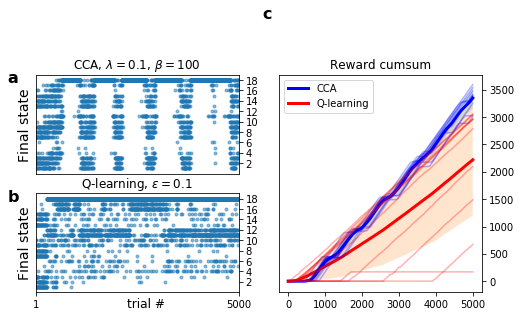

In [43]:
plt.figure(figsize = (8,4))


ax = plt.subplot(2,2,1)
ax.plot(np.array(mem_obs_final_T2[0])+1, '.', alpha=.5)
ax.set_xlim(0,5000)
ax.set_ylim(0,19)
ax.set_yticks([2,4,6,8,10,12,14,16,18])
ax.set_xticks([])
ax.set_ylabel('Final state', fontsize=14)

ax.set_title('States', fontsize=14)
ax.set_title(f'CCA, $\lambda={args.PREC}$, $\\beta=${BETA_REF}')
ax.yaxis.tick_right()
ax.text(-700, 17.5, 'a', fontsize=16, fontweight ="bold")



ax = plt.subplot(2,2,3)
ax.plot(np.array(mem_obs_final_T2_Q[0])+1, '.', alpha=.5)
ax.set_xlim(0,5000)
ax.set_ylim(0,19)
ax.set_yticks([2,4,6,8,10,12,14,16,18])
ax.set_xticks([1, 5000])
ax.text(2250, -3, 'trial #', fontsize=12)    
ax.set_ylabel('Final state', fontsize=14)

ax.set_title('States', fontsize=14)
ax.set_title('Q-learning, $\epsilon=0.1$')
ax.yaxis.tick_right()
ax.text(-700, 17.5, 'b', fontsize=16, fontweight ="bold")



ax = plt.subplot(1,2,2)

ax.plot(mean_total_reward_T2, 'b', linewidth=3, label='CCA')
ax.fill_between(range(5000),
                 mean_total_reward_T2-std_total_reward_T2,
                 mean_total_reward_T2+std_total_reward_T2,
                 alpha=.2)
ax.plot(mean_total_reward_T2_Q,'r', linewidth=3, label='Q-learning')
ax.fill_between(range(5000),
                 mean_total_reward_T2_Q-std_total_reward_T2_Q,
                 mean_total_reward_T2_Q+std_total_reward_T2_Q,
                 alpha=.2)

for turn, BETA in enumerate(BETA_range):
    ax.plot(np.cumsum(mem_total_reward_T2[turn]),'b', alpha=.3)
    
for turn, BETA in enumerate(BETA_range):
    ax.plot(np.cumsum(mem_total_reward_T2_Q[turn]),'r', alpha=.3)
ax.legend()
ax.yaxis.tick_right()
ax.text(-700, 4800, 'c', fontsize=16, fontweight ="bold")

ax.set_title('Reward cumsum')

#plt.savefig('220520_cca_T2.pdf', bbox_inches='tight')

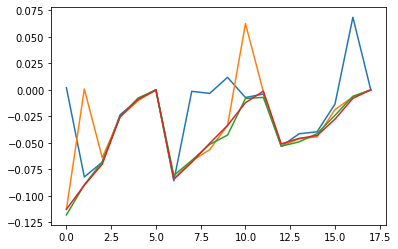

In [44]:
plt.plot(trainer.agent.Q_var_tab)
